<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd              
import seaborn as sns            
import os, warnings

import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

%pylab inline

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=3)
os.chdir("../../donnees")

warnings.filterwarnings(action="ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
meteo = pd.read_parquet('meteoJ.gzip', engine='pyarrow')
meteo.head()

,,,,,0101Humidite,0102Humidite,0103Humidite,0104Humidite,0105Humidite,0106Humidite,0107Humidite,0108Humidite,0109Humidite,0110Humidite,...,1222VitesseVent,1223VitesseVent,1224VitesseVent,1225VitesseVent,1226VitesseVent,1227VitesseVent,1228VitesseVent,1229VitesseVent,1230VitesseVent,1231VitesseVent
Nom,Latitude,Longitude,Altitude,Zone,,,,,,,,,,,,,,,,,,,,,
Abbeville,50.136000,1.834000,69,NO,88.888393,87.147321,87.040724,85.946429,86.986607,86.589286,85.861607,86.843750,86.459821,88.120536,...,5.232407,5.119444,5.384259,4.987500,4.882407,4.933178,4.550463,4.356481,4.648148,4.187907
Ajaccio,41.918000,8.792667,5,SE,77.473214,78.704036,78.472973,79.636364,78.834821,77.833333,77.981651,79.395455,77.964126,77.838565,...,2.907212,3.016588,2.898148,3.379167,3.146729,3.426389,4.361395,3.154167,2.858140,3.199074
Alencon,48.445500,0.110167,143,NO,91.162162,88.331839,89.138393,89.187500,89.160714,90.617117,89.669643,89.584821,88.522321,89.526786,...,3.989352,3.950235,4.155140,4.248837,3.849537,4.061972,3.685648,3.302315,3.485116,3.516744
Bale,47.614333,7.510000,263,NE,87.825893,85.986607,83.861607,84.660714,84.227679,86.656250,86.659193,86.486607,85.565022,87.151786,...,3.197222,2.501860,2.897674,3.091667,3.117209,3.185047,3.499074,2.945116,2.651389,2.319535
Bastia,42.540667,9.485167,10,SE,74.080357,72.793722,69.552036,71.607143,71.566964,75.743243,77.309091,77.678571,74.236364,74.193694,...,3.292130,3.020000,2.726168,3.088626,3.713679,3.415349,3.578241,2.970833,3.042593,3.071163


In [4]:
meteo.shape

(42, 2196)

In [6]:
x = meteo.values
ville = meteo.reset_index().Nom

In [7]:
from sklearn.preprocessing import scale
x = scale(x)

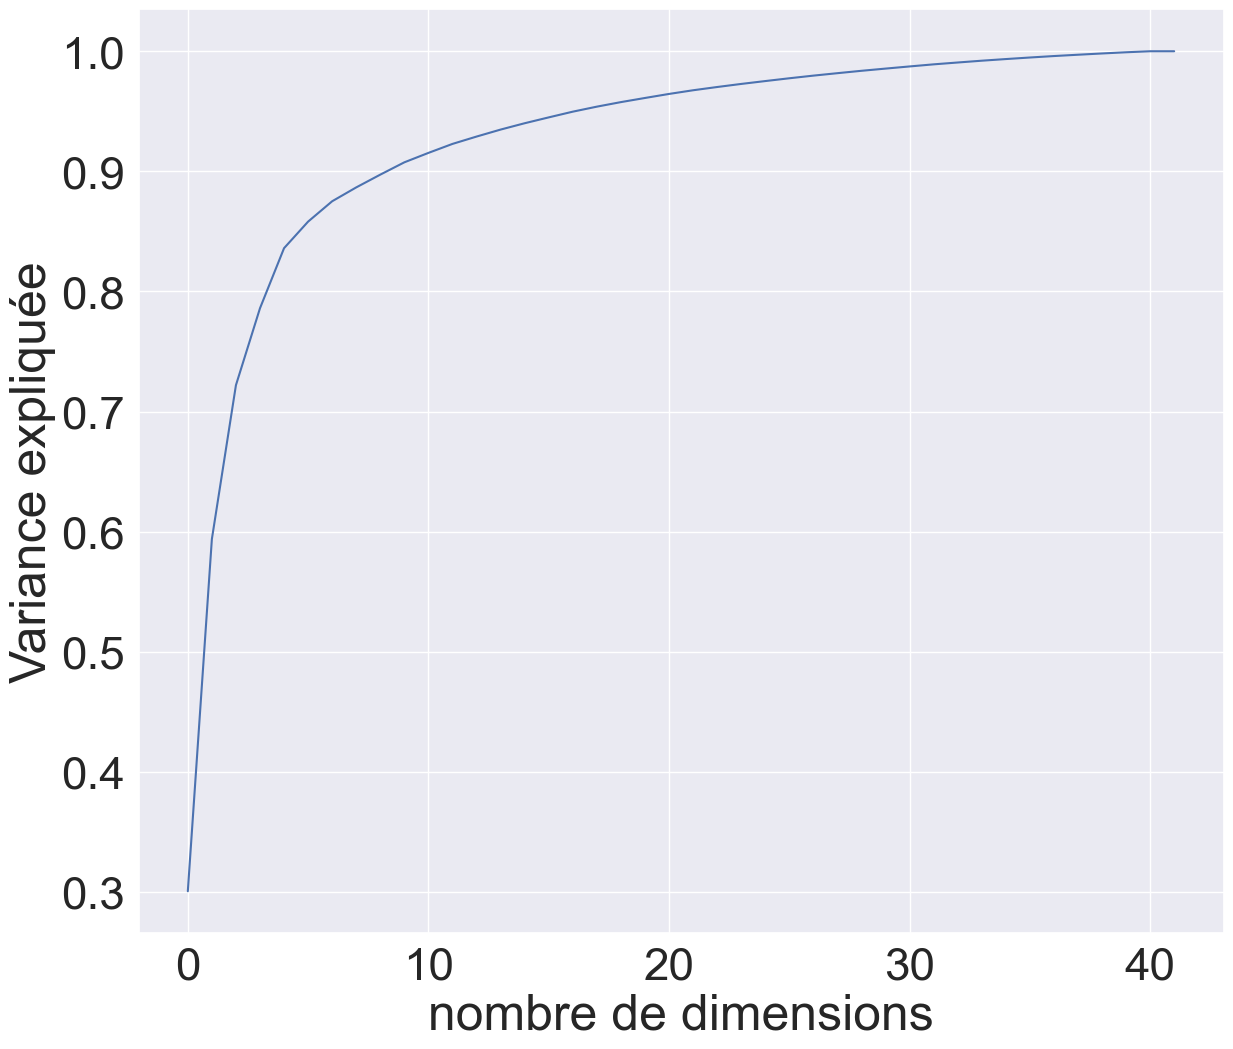

In [8]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.figure(figsize=(14,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de dimensions')
plt.ylabel('Variance expliquée');

In [9]:
pca.explained_variance_ratio_.cumsum()*100

array([ 30.05863354,  59.38388805,  72.19488812,  78.60191456,
        83.60289198,  85.81546126,  87.51014831,  88.66347284,
        89.72659977,  90.75130047,  91.53576111,  92.28427304,
        92.89532734,  93.47747931,  94.00513498,  94.49254272,
        94.96868487,  95.38601349,  95.76437984,  96.10857488,
        96.44470931,  96.75104251,  97.02162107,  97.27787402,
        97.51666292,  97.74970759,  97.96989952,  98.17344831,
        98.37211536,  98.55533809,  98.73482141,  98.90933941,
        99.06288807,  99.21278819,  99.34916544,  99.47863002,
        99.60020167,  99.71035175,  99.81584405,  99.91476833,
       100.        , 100.        ])

In [11]:
no_dim = sum(pca.explained_variance_ratio_.cumsum() < .95) + 1

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=no_dim)
x_red = pca.fit(x).transform(x)
dfPCA = pd.DataFrame(data=x_red, columns=[f'Dim{i+1:02d}'for i in range(no_dim)])
dfPCA['Ville']= ville
dfPCA.head()

,Dim01,Dim02,Dim03,Dim04,Dim05,Dim06,Dim07,Dim08,Dim09,Dim10,Dim11,Dim12,Dim13,Dim14,Dim15,Dim16,Dim17,Dim18,Ville
0,-29.247253,-18.231634,-3.102841,-2.800708,-1.613539,-4.676155,3.390380,3.321994,-2.431389,-0.310171,-5.067208,-4.208113,-4.253213,-3.675174,5.936566,-0.232124,0.025035,-0.156267,Abbeville
1,36.893392,-9.035965,-10.597211,14.955536,0.671205,-5.356764,-8.109628,-7.060181,0.326400,-6.923876,-2.120241,-2.169378,-2.233936,-7.106913,-5.482456,0.466908,8.411835,9.125549,Ajaccio
2,-26.460183,-4.016768,-9.567758,-0.572767,-8.339674,-1.060421,-0.906736,-4.110634,-5.709133,2.375953,1.020756,-3.029359,-0.969810,-1.877167,-2.621629,-0.824044,-5.527869,1.386700,Alencon
3,-17.276412,23.830447,-12.643399,-3.991716,-4.872559,-3.512405,5.598972,5.628621,3.448357,-7.744950,0.986094,4.982021,5.367016,-6.306238,0.167421,-1.251602,-3.987190,-1.945455,Bale
4,41.001660,-4.994523,-12.256736,23.584289,-4.212415,-11.511442,-1.712363,-9.037440,-9.804125,-10.257254,0.469147,7.010396,-5.109180,-0.699338,4.862762,-4.499353,0.666377,-7.565649,Bastia


<Figure size 640x480 with 0 Axes>

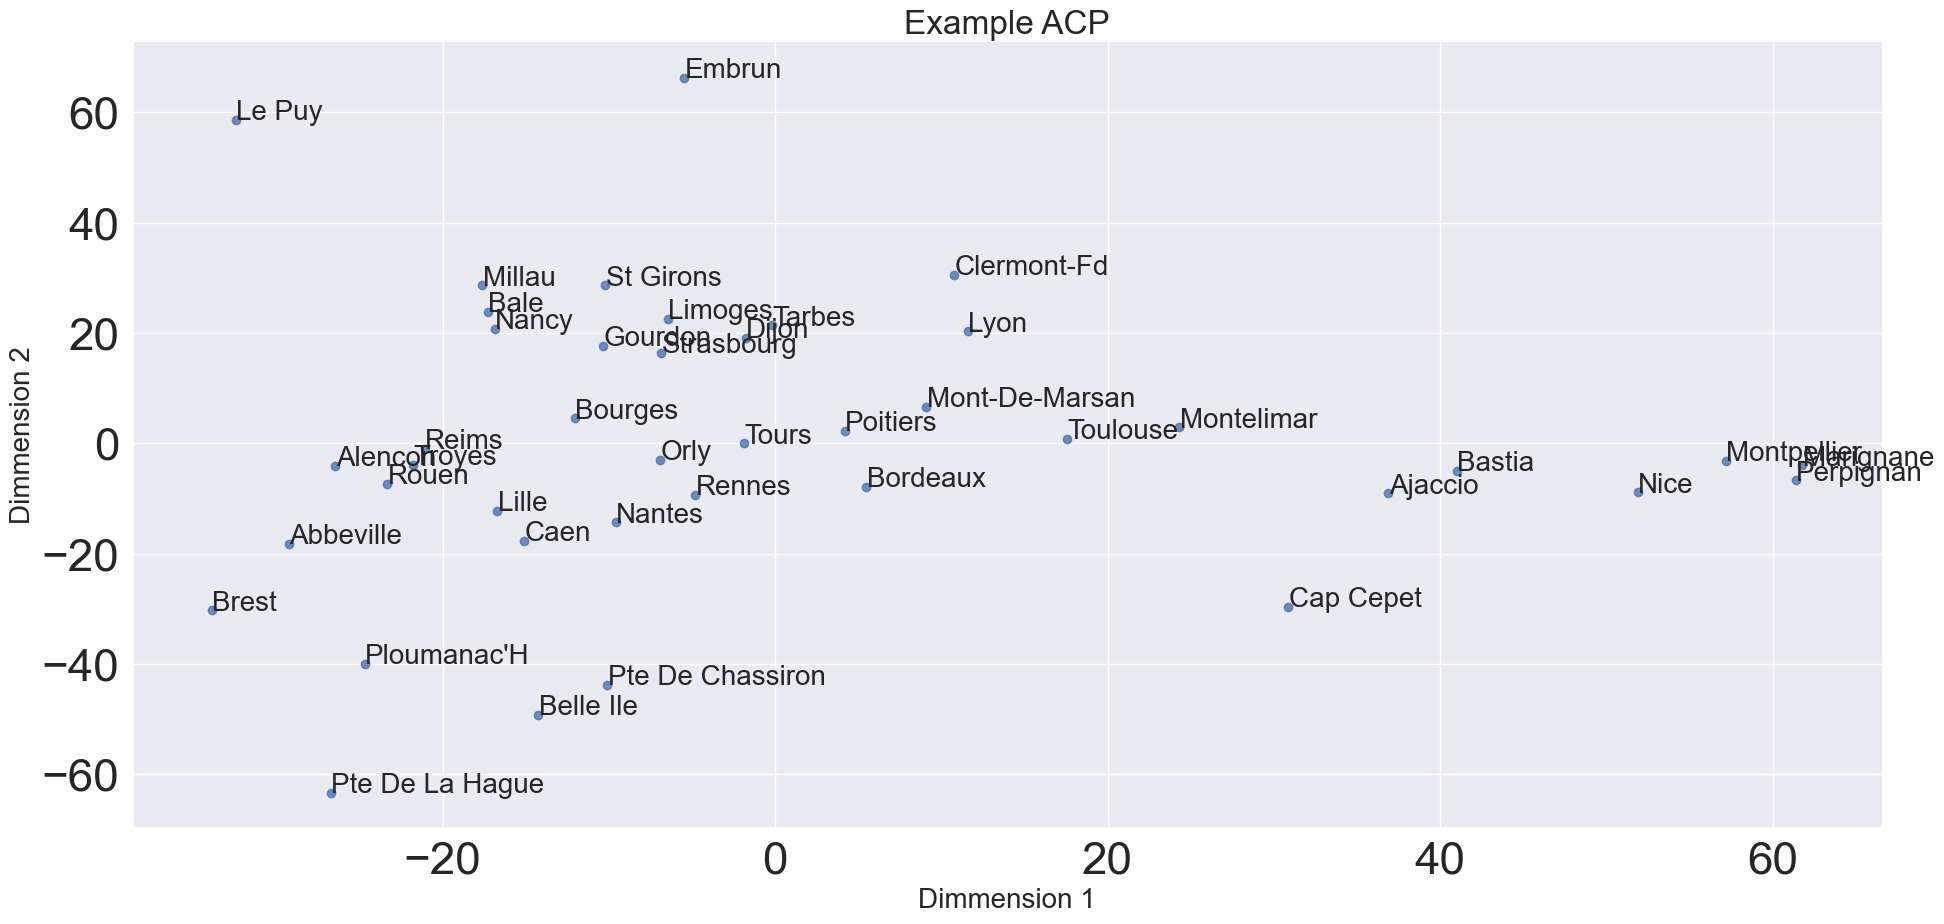

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.figure()

ax = sns.lmplot(x='Dim01',y='Dim02', data=dfPCA, fit_reg=False,  height=10, aspect =2 ) 

plt.title('Example ACP', fontproperties=font2)
plt.xlabel('Dimmension 1', fontproperties=font1)
plt.ylabel('Dimmension 2', fontproperties=font1)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), fontproperties=font1)

label_point(dfPCA.Dim01, dfPCA.Dim02, dfPCA.Ville, plt.gca())

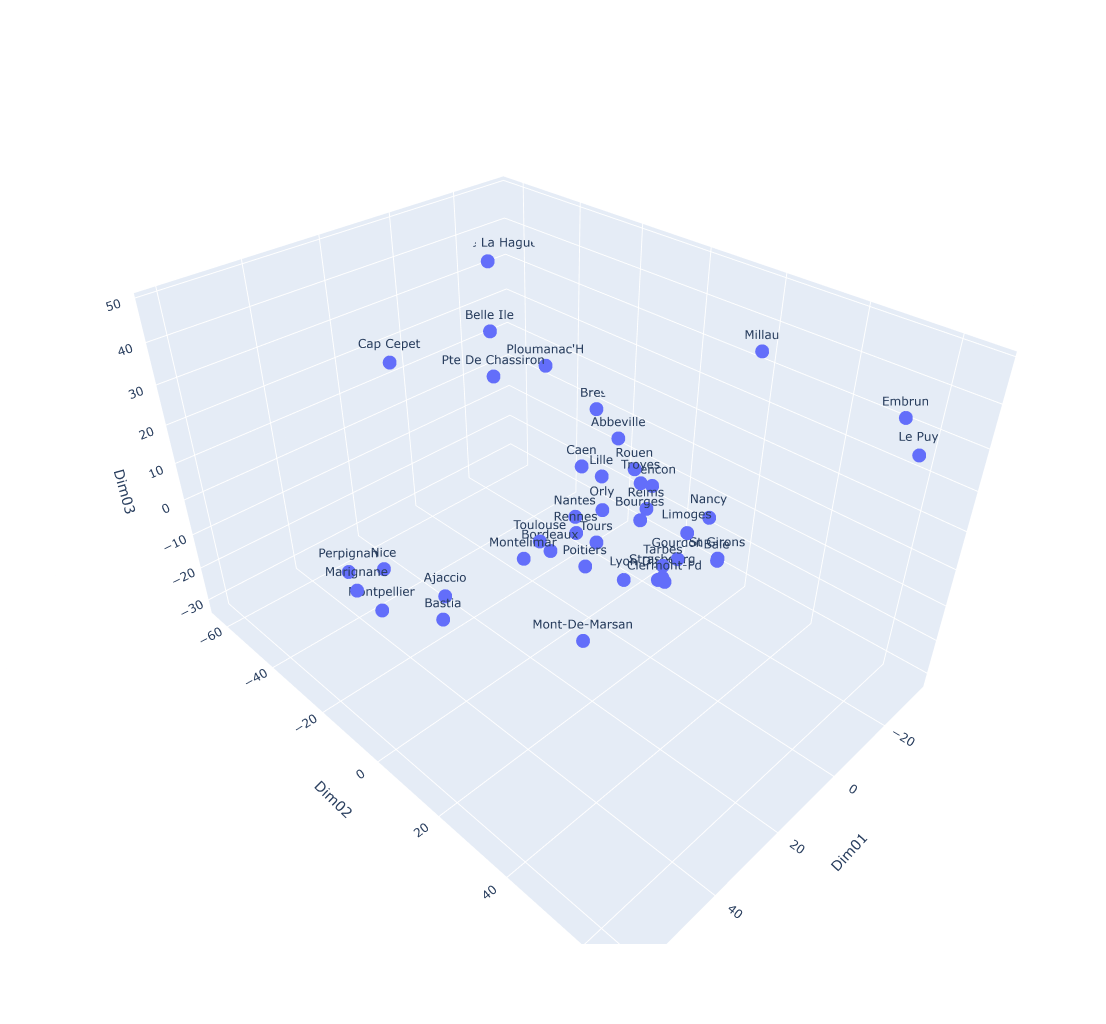

In [15]:
import plotly.express as px
fig = px.scatter_3d(dfPCA, 
                    x='Dim01', 
                    y='Dim02', 
                    z='Dim03',
                    # color='Eat',
                    #size=np.abs(donnees.Eat),
                    #symbol='CD23',
                    text='Ville', 
                    width=900,
                    height=1024,
                   )

fig.show()

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
#Z = linkage(dfPCA.iloc[:,0:5], 'ward')
#Z = linkage(dfPCA.iloc[:,:-1], 'ward')
Z = linkage(dfPCA.drop(columns='Ville'), metric='euclidean', method='ward')
#Z = linkage(dfPCA.iloc[:,:5], 'ward')


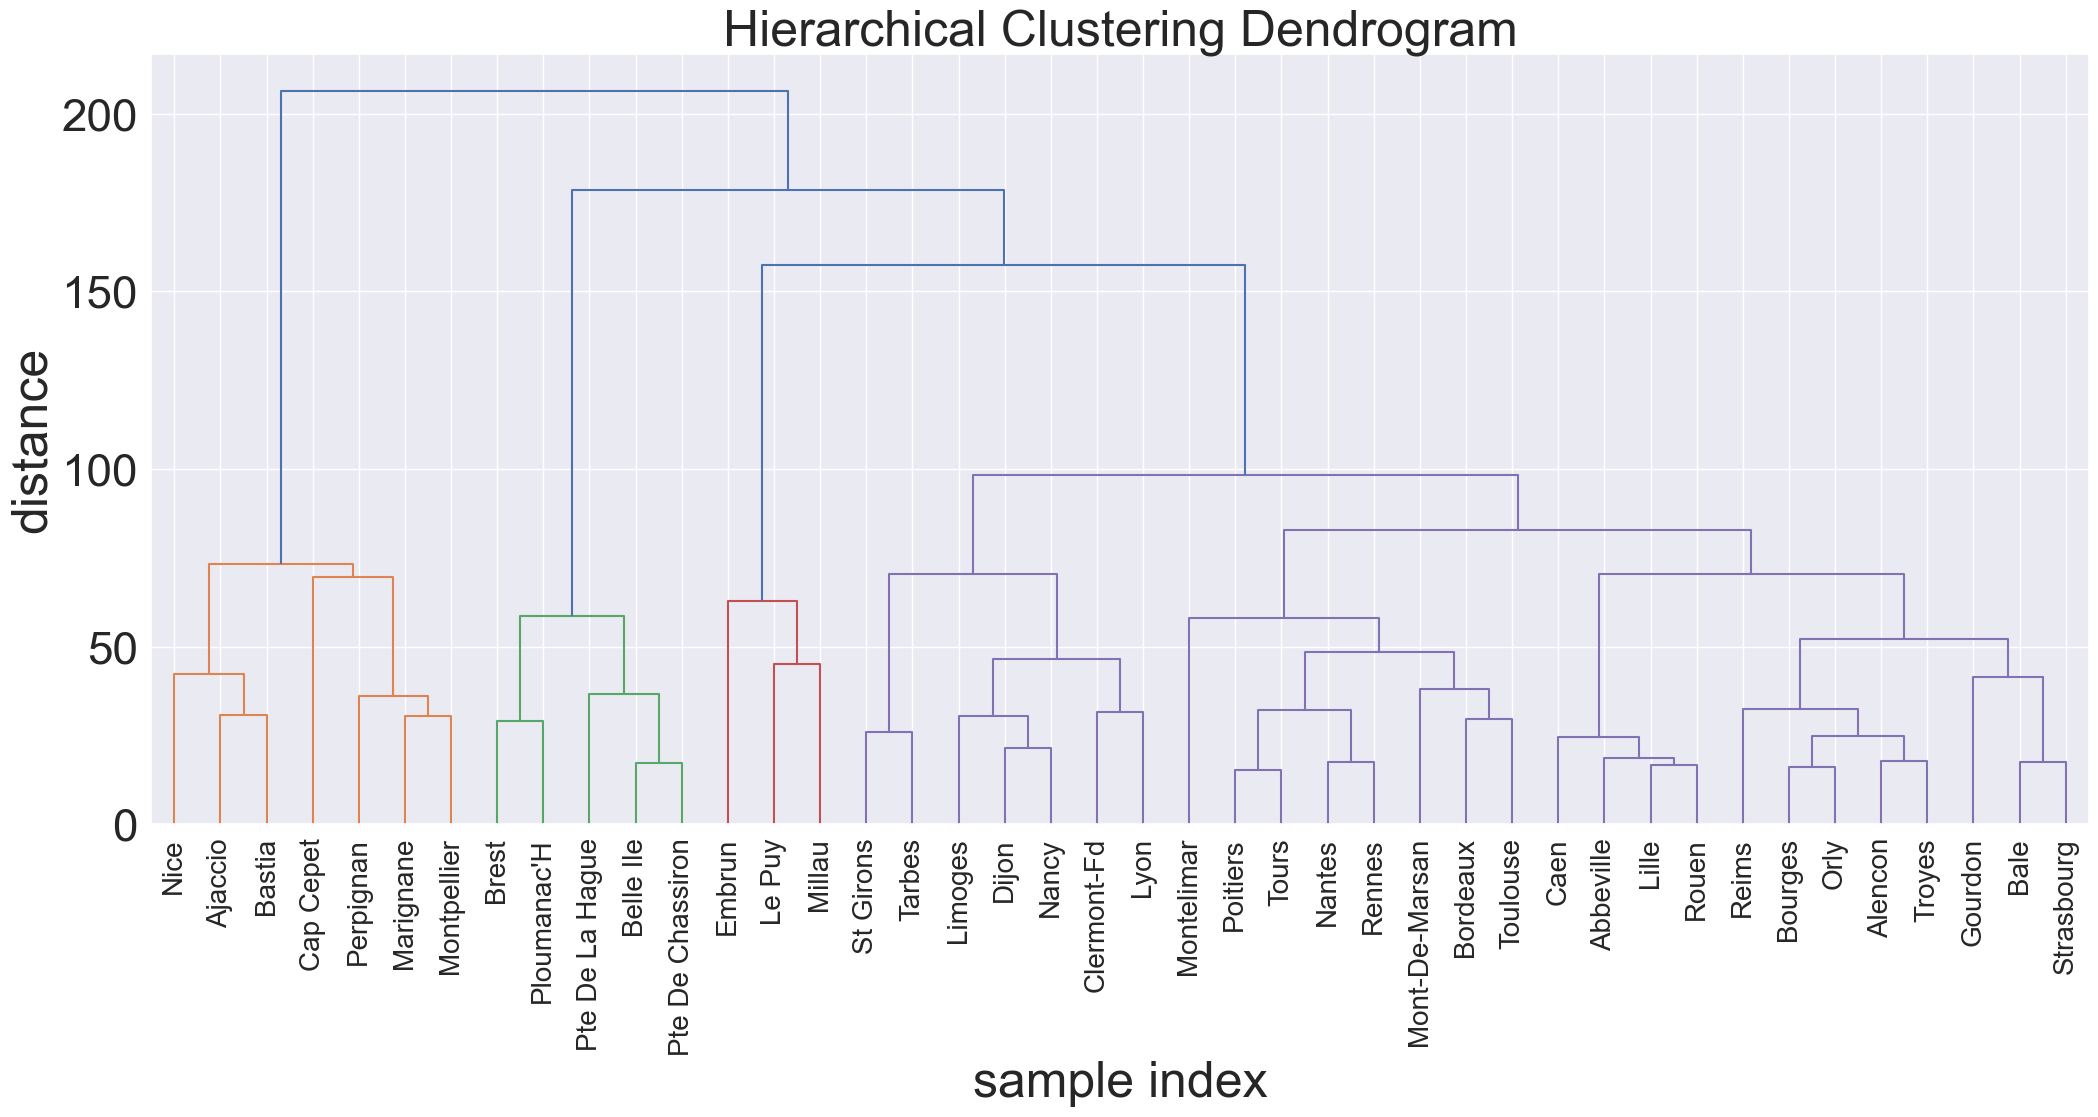

In [17]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram( Z,leaf_rotation=90.,leaf_font_size=20.,
           labels = dfPCA.Ville.values)
plt.show()

In [18]:
def afficheDendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    titre = kwargs.pop('titre', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
        
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title(titre)
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

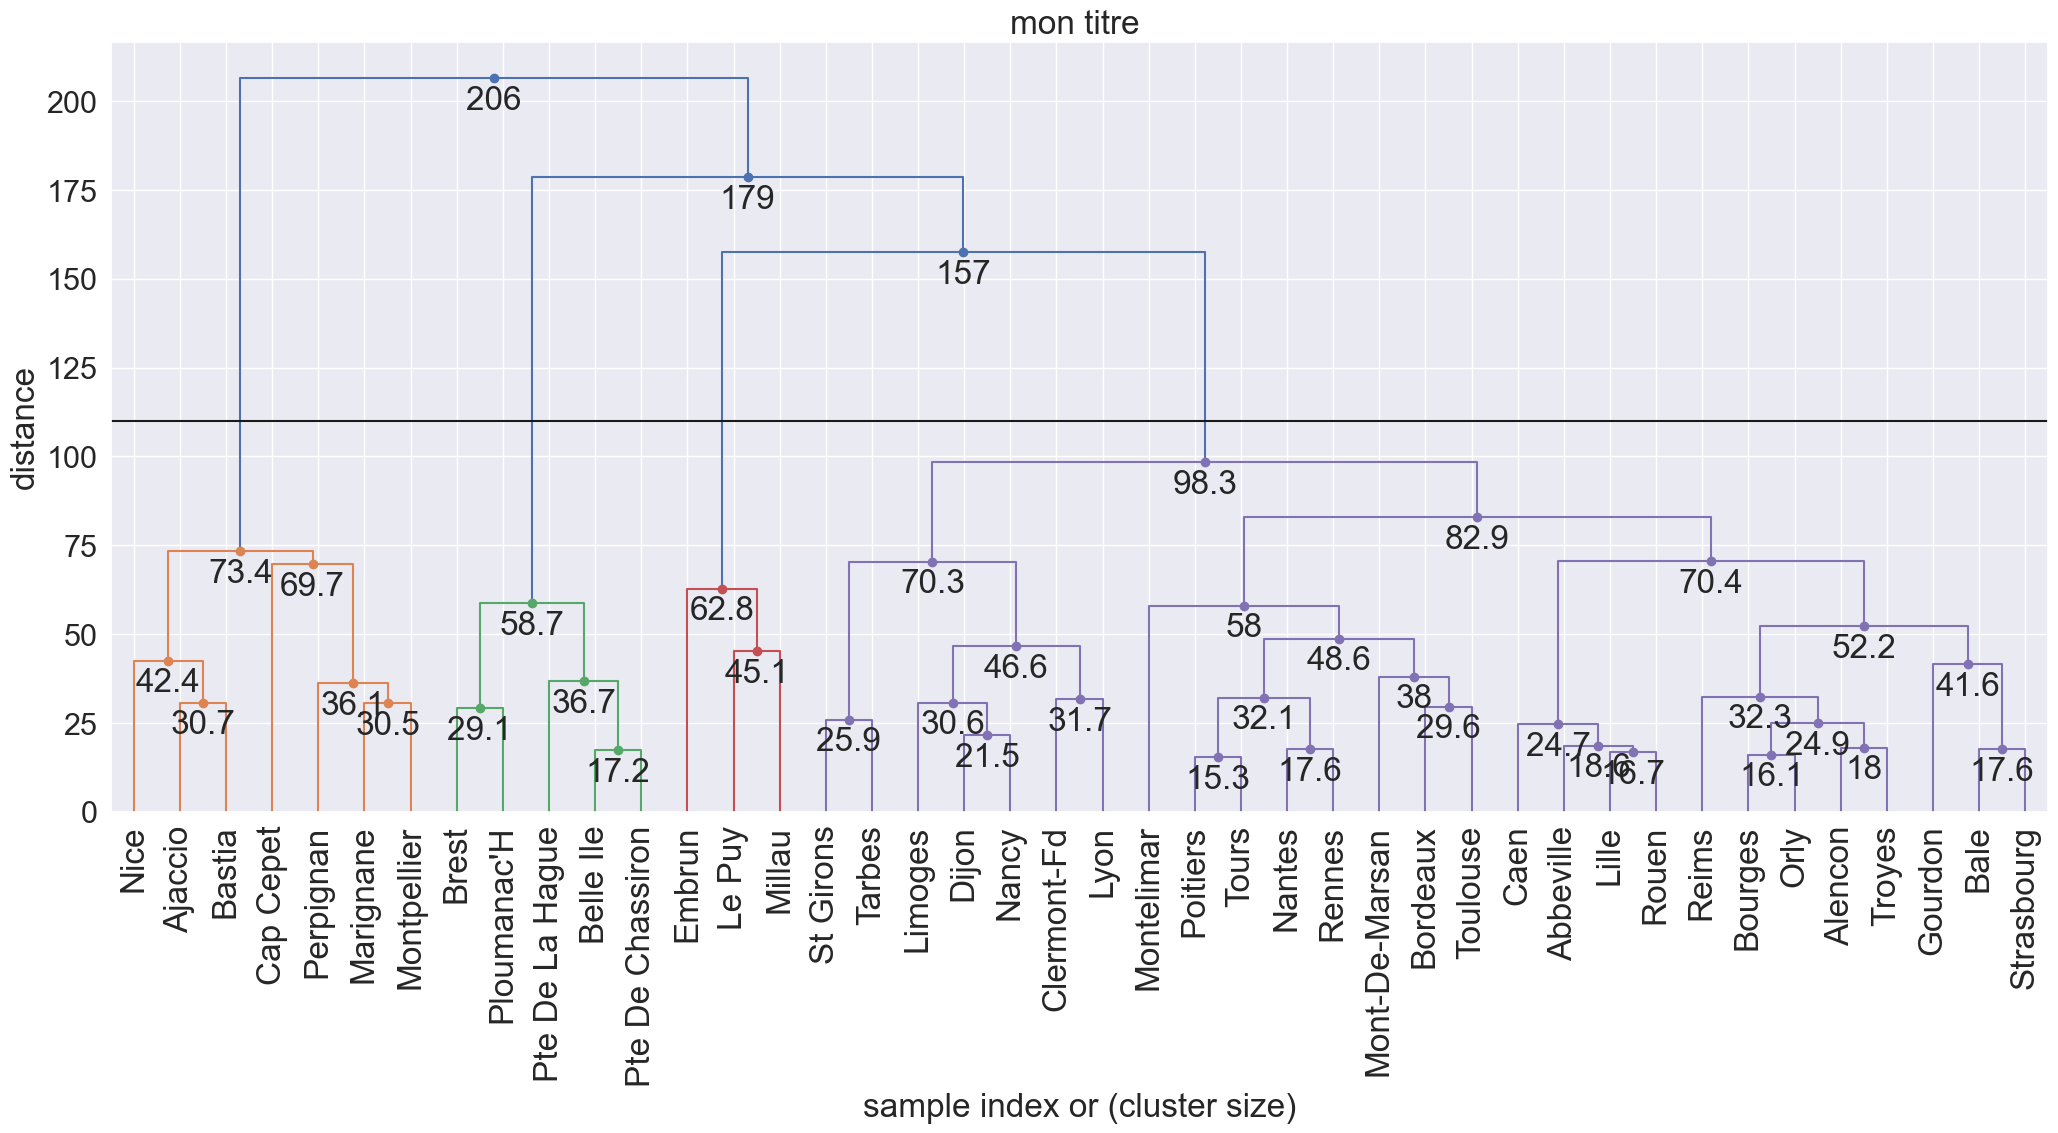

In [20]:
plt.figure(figsize=(25, 10))
sns.set(font_scale=2)
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=42,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    max_d=110,  # plot a horizontal cut-off line
    labels = dfPCA.Ville.values,
    titre = 'mon titre '
)
plt.show()

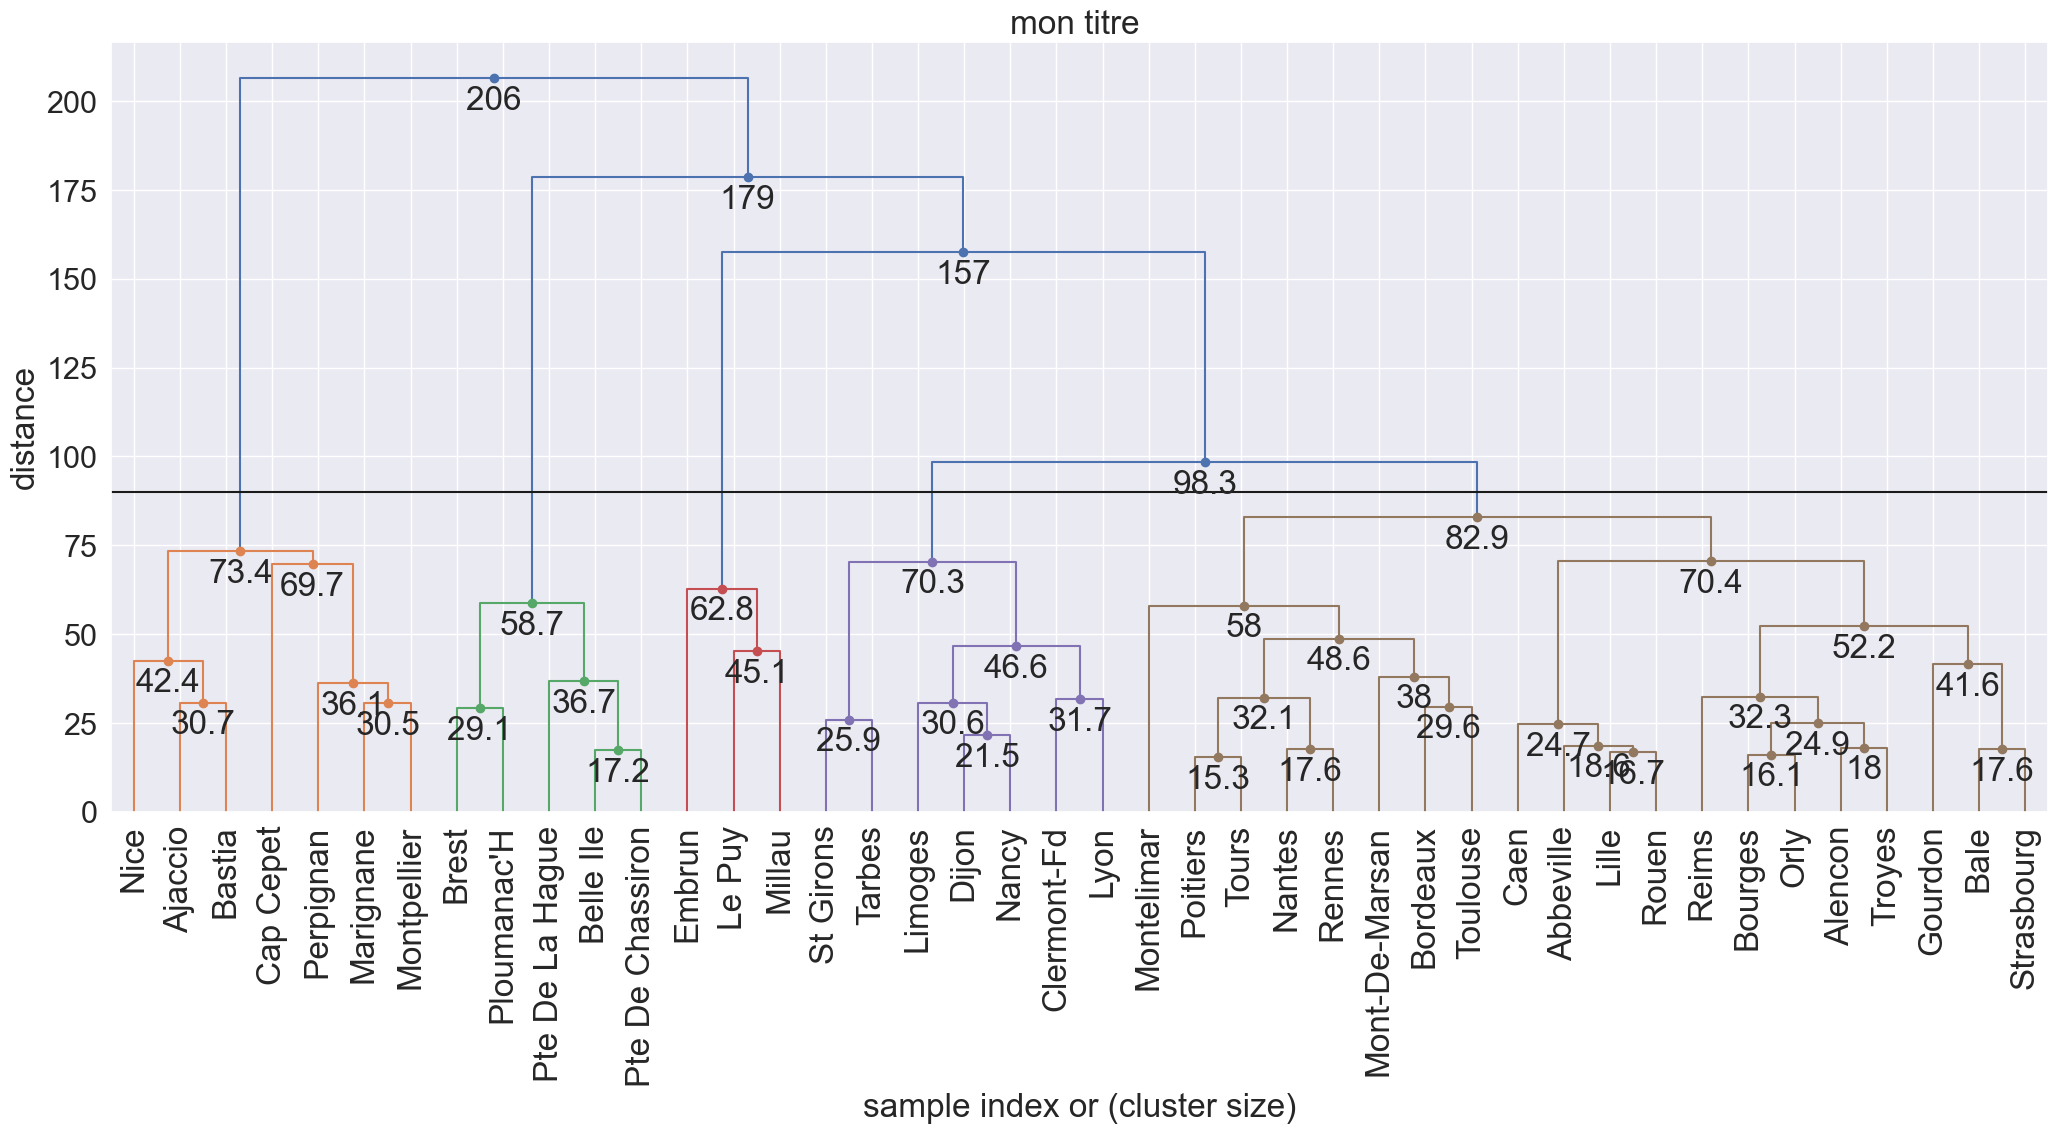

In [22]:
plt.figure(figsize=(25, 10))
sns.set(font_scale=2)
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=42,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    max_d=90,  # plot a horizontal cut-off line
    labels = dfPCA.Ville.values,
    titre = 'mon titre '
)
plt.show()

In [22]:
Z.shape

(41, 4)

In [24]:
from scipy.cluster.hierarchy import fcluster
dfPCA['Classe4']=fcluster(Z, t=110, criterion='distance')
dfPCA['Classe5']=fcluster(Z, t=90, criterion='distance')
dfPCA['Classe6']=fcluster(Z, t=80, criterion='distance')


In [25]:
dfPCA.head()

,Dim01,Dim02,Dim03,Dim04,Dim05,Dim06,Dim07,Dim08,Dim09,Dim10,...,Dim13,Dim14,Dim15,Dim16,Dim17,Dim18,Ville,Classe4,Classe5,Classe6
0,-29.247253,-18.231634,-3.102841,-2.800708,-1.613539,-4.676155,3.390380,3.321994,-2.431389,-0.310171,...,-4.253213,-3.675174,5.936566,-0.232124,0.025035,-0.156267,Abbeville,4,5,6
1,36.893392,-9.035965,-10.597211,14.955536,0.671205,-5.356764,-8.109628,-7.060181,0.326400,-6.923876,...,-2.233936,-7.106913,-5.482456,0.466908,8.411835,9.125549,Ajaccio,1,1,1
2,-26.460183,-4.016768,-9.567758,-0.572767,-8.339674,-1.060421,-0.906736,-4.110634,-5.709133,2.375953,...,-0.969810,-1.877167,-2.621629,-0.824044,-5.527869,1.386700,Alencon,4,5,6
3,-17.276412,23.830447,-12.643399,-3.991716,-4.872559,-3.512405,5.598972,5.628621,3.448357,-7.744950,...,5.367016,-6.306238,0.167421,-1.251602,-3.987190,-1.945455,Bale,4,5,6
4,41.001660,-4.994523,-12.256736,23.584289,-4.212415,-11.511442,-1.712363,-9.037440,-9.804125,-10.257254,...,-5.109180,-0.699338,4.862762,-4.499353,0.666377,-7.565649,Bastia,1,1,1


<Figure size 640x480 with 0 Axes>

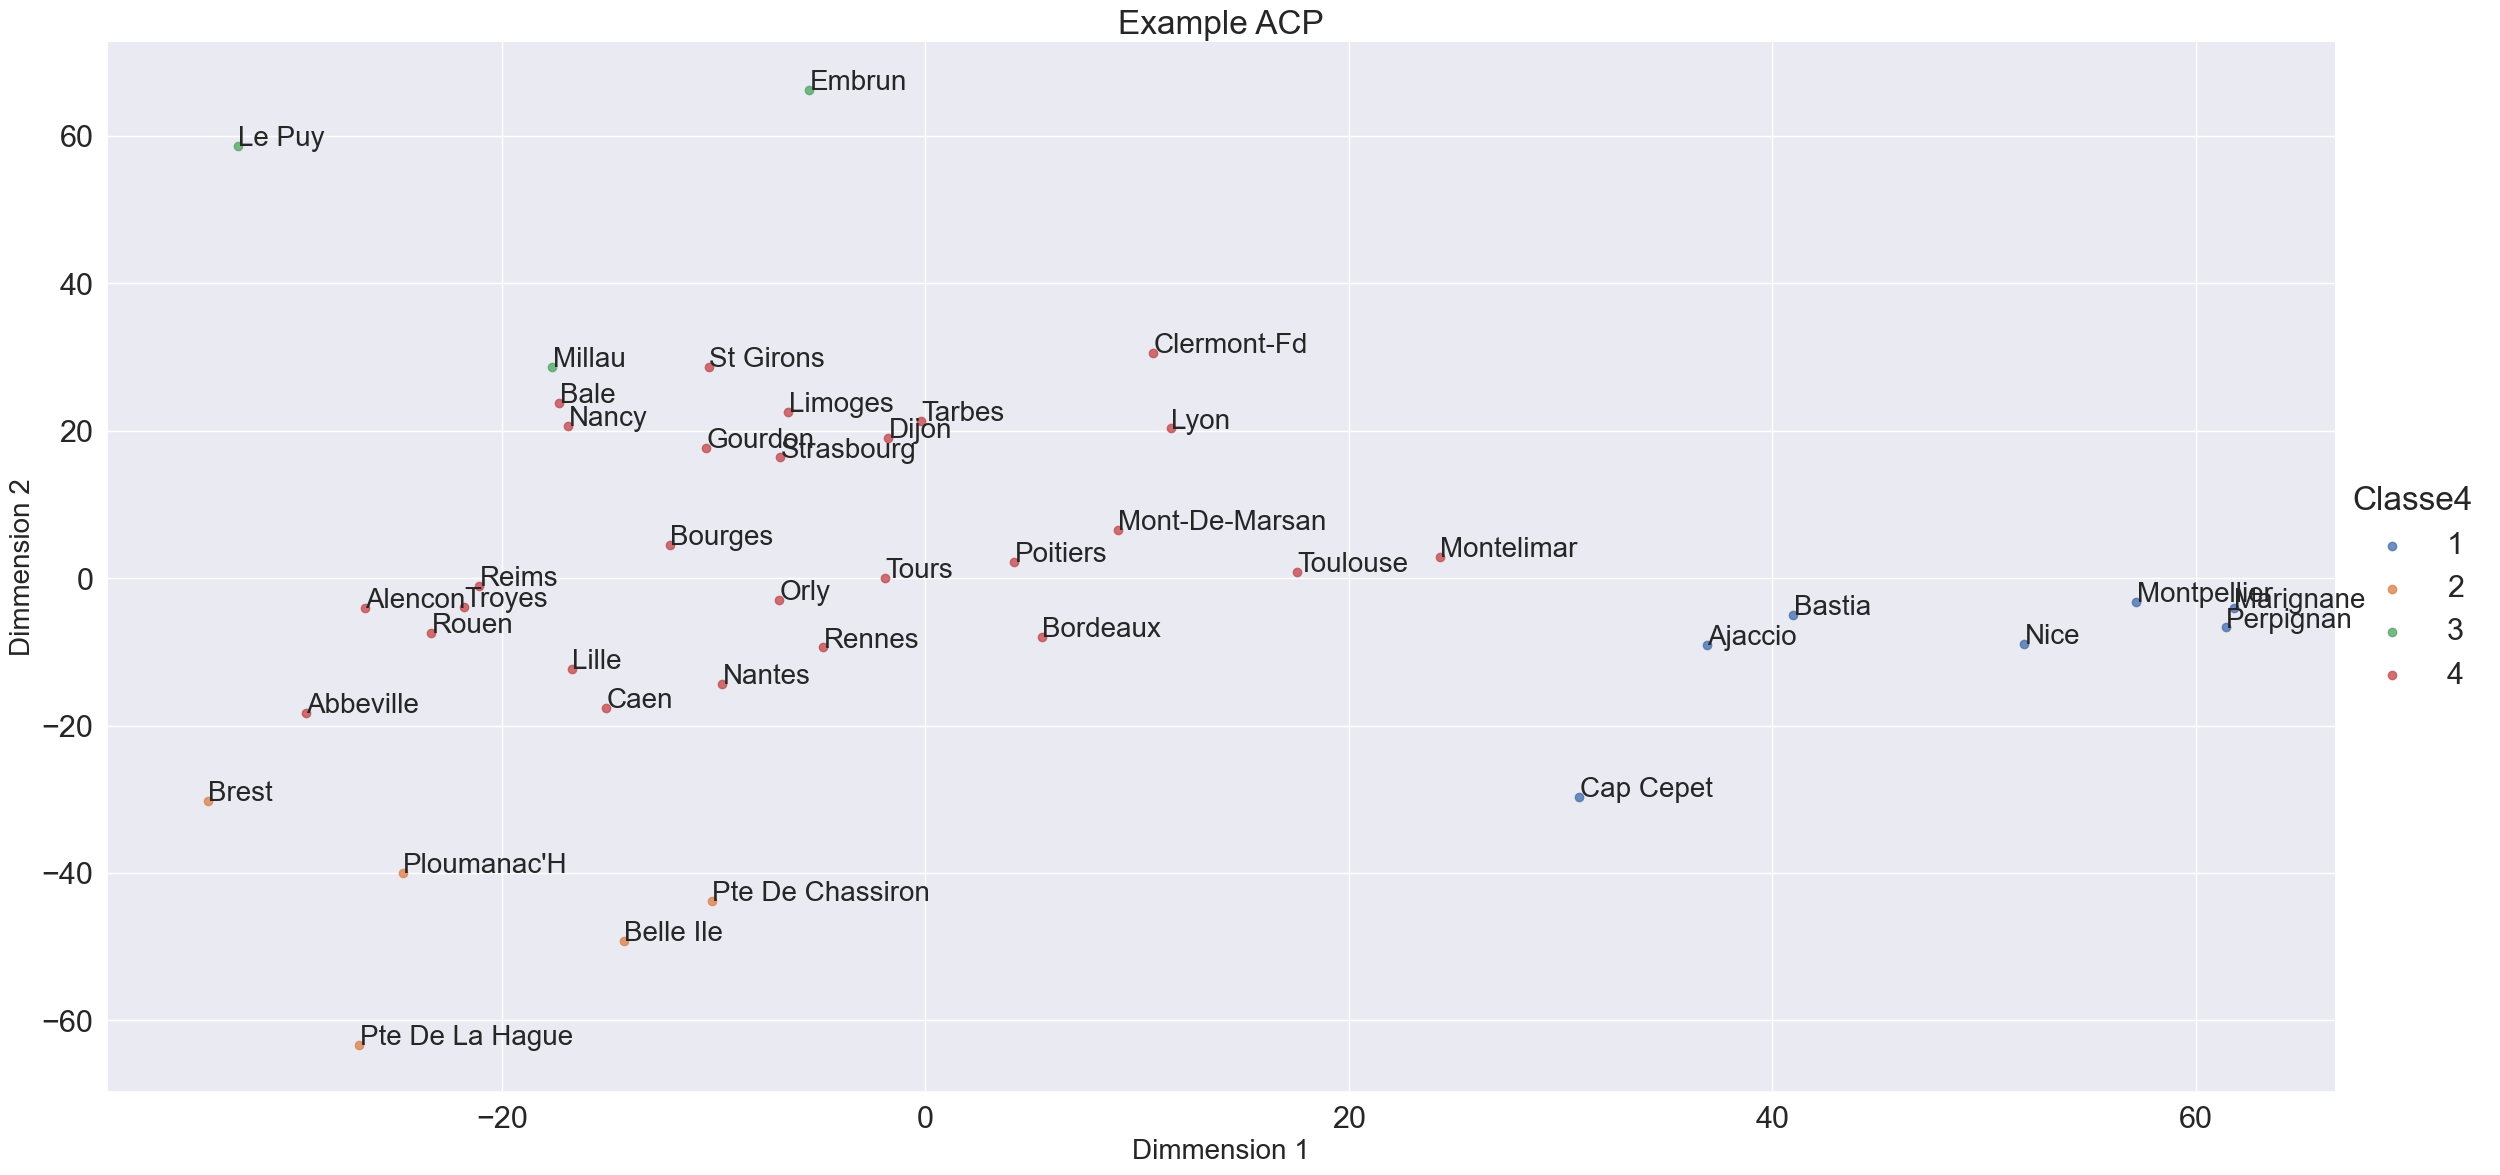

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.figure()

ax = sns.lmplot(x='Dim01',y='Dim02', data=dfPCA, hue='Classe4',  fit_reg=False,  height=12, aspect =2 ) 

plt.title('Example ACP', fontproperties=font2)
plt.xlabel('Dimmension 1', fontproperties=font1)
plt.ylabel('Dimmension 2', fontproperties=font1)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), fontproperties=font1)

label_point(dfPCA.Dim01, dfPCA.Dim02, dfPCA.Ville, plt.gca())

<Figure size 640x480 with 0 Axes>

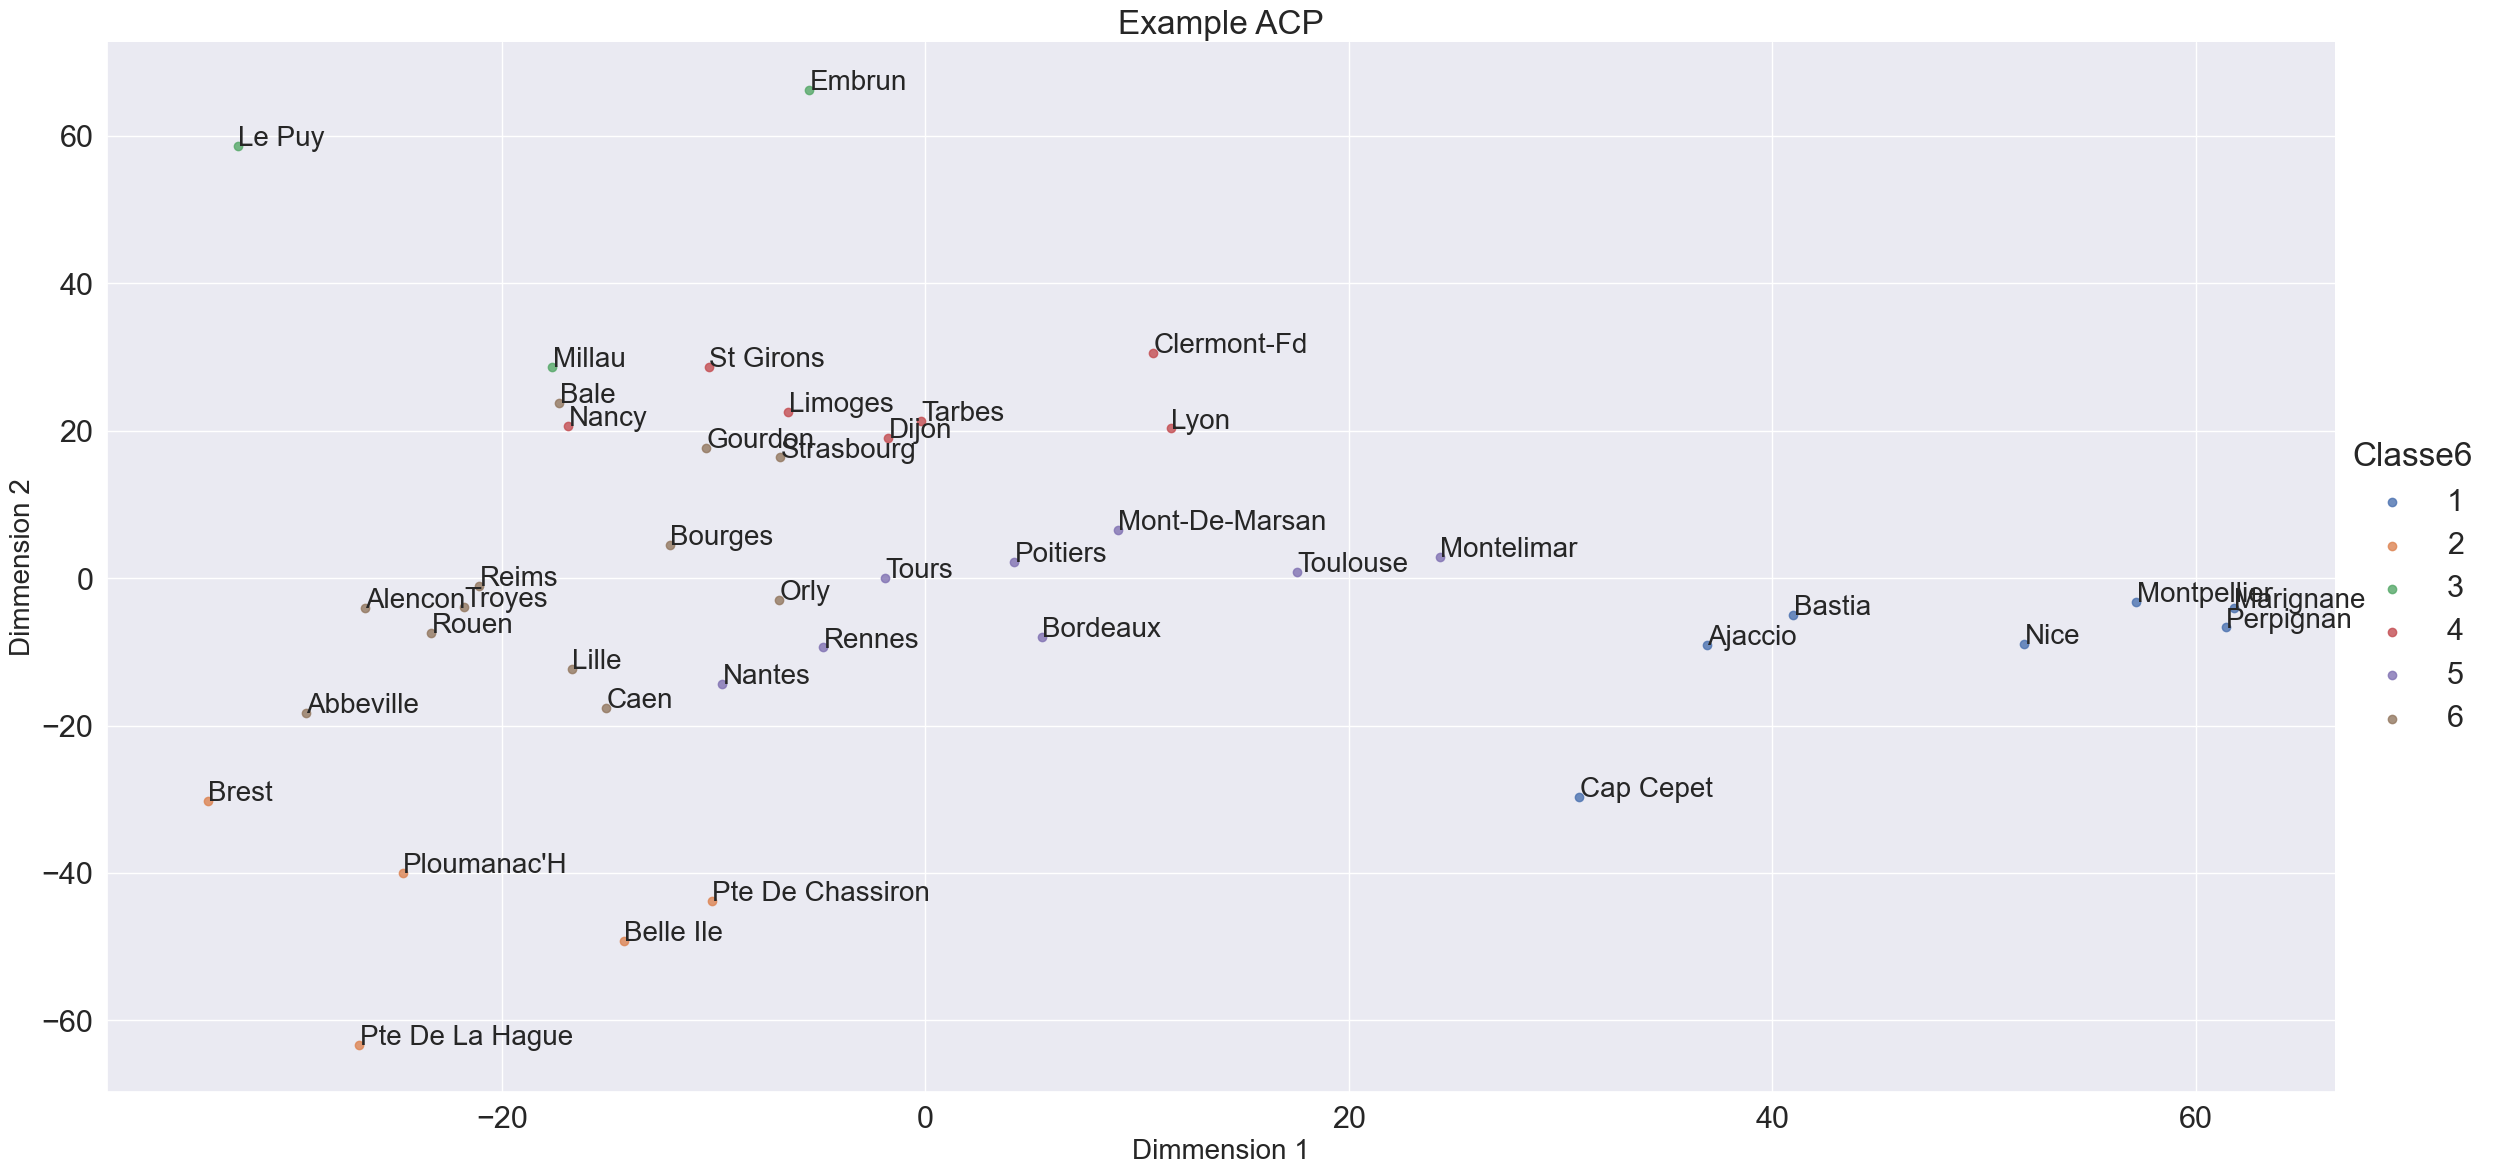

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.figure()

ax = sns.lmplot(x='Dim01',y='Dim02', data=dfPCA, hue='Classe6',  fit_reg=False,  height=12, aspect =2 ) 

plt.title('Example ACP', fontproperties=font2)
plt.xlabel('Dimmension 1', fontproperties=font1)
plt.ylabel('Dimmension 2', fontproperties=font1)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), fontproperties=font1)

label_point(dfPCA.Dim01, dfPCA.Dim02, dfPCA.Ville, plt.gca())

In [28]:
dfPCA.iloc[:,:-4].head()

,Dim1,Dim2,Dim3,Dim4,Dim5
0,-5.143093,-28.263275,1.113159,-2.807859,-4.222923
1,-22.953399,21.026096,-13.316346,12.705632,4.231792
2,7.794759,-17.610817,-9.316877,-2.148869,0.291873
3,26.889062,-5.185913,-13.213791,-1.976655,-3.830247
4,-19.684191,28.870433,-18.568462,16.774423,0.338930


For n_clusters = 2 The average silhouette_score is : 0.34004917624709924
For n_clusters = 3 The average silhouette_score is : 0.3172199037212187
For n_clusters = 4 The average silhouette_score is : 0.3714167110557162
For n_clusters = 5 The average silhouette_score is : 0.3245939344005737
For n_clusters = 6 The average silhouette_score is : 0.32702366863937204
For n_clusters = 7 The average silhouette_score is : 0.32185183969242476
For n_clusters = 8 The average silhouette_score is : 0.26769387734706596
For n_clusters = 9 The average silhouette_score is : 0.2941301539599759
For n_clusters = 10 The average silhouette_score is : 0.284963922411221
For n_clusters = 11 The average silhouette_score is : 0.27785856029630684
For n_clusters = 12 The average silhouette_score is : 0.2468640925787001


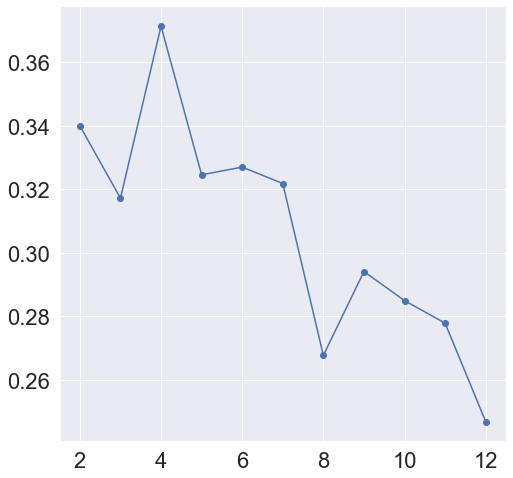

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score,  adjusted_mutual_info_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = dfPCA.iloc[:,:-4]


range_n_clusters = [ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

silhouettes = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer.fit(X)
    cluster_labels = clusterer.predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouettes.append(silhouette_avg)

plt.figure(figsize=(8,8))    
plt.plot(range_n_clusters,silhouettes,marker='o')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.34004917624709924


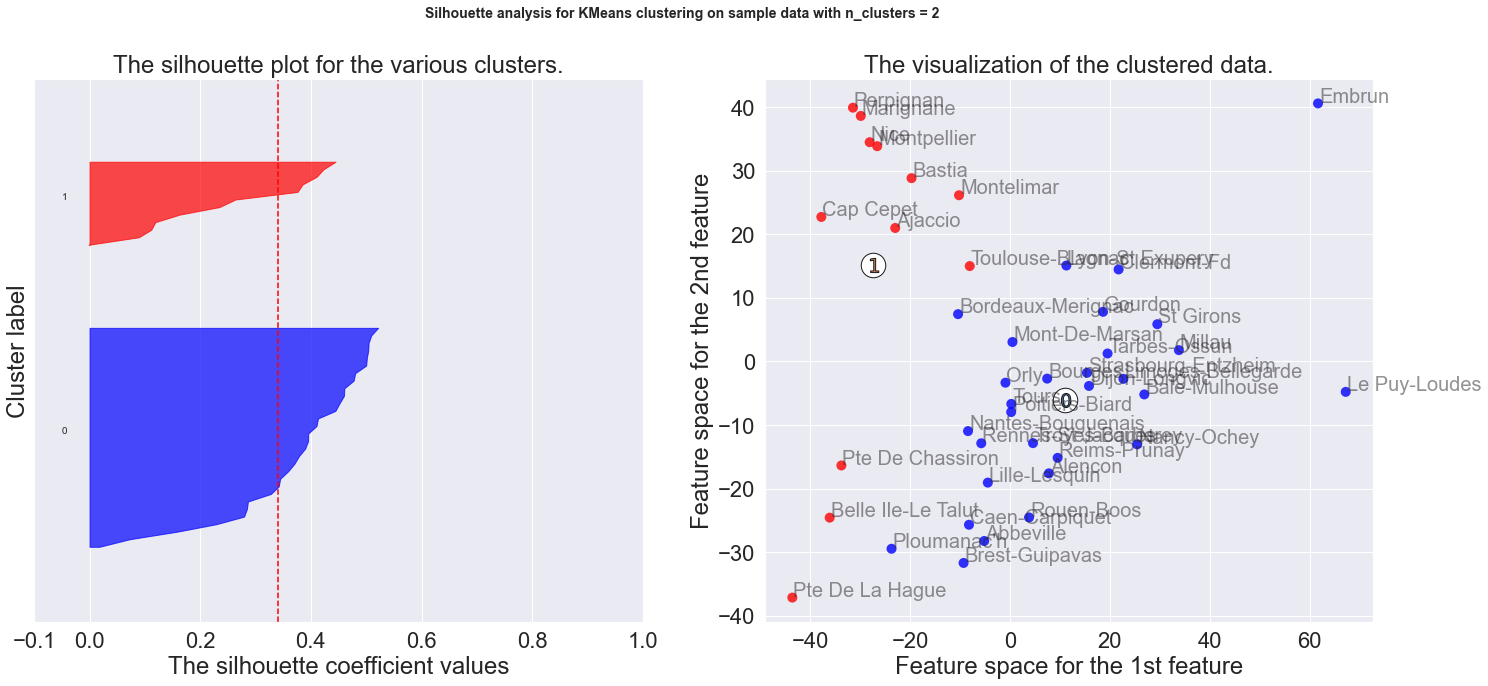

For n_clusters = 3 The average silhouette_score is : 0.3172199037212187


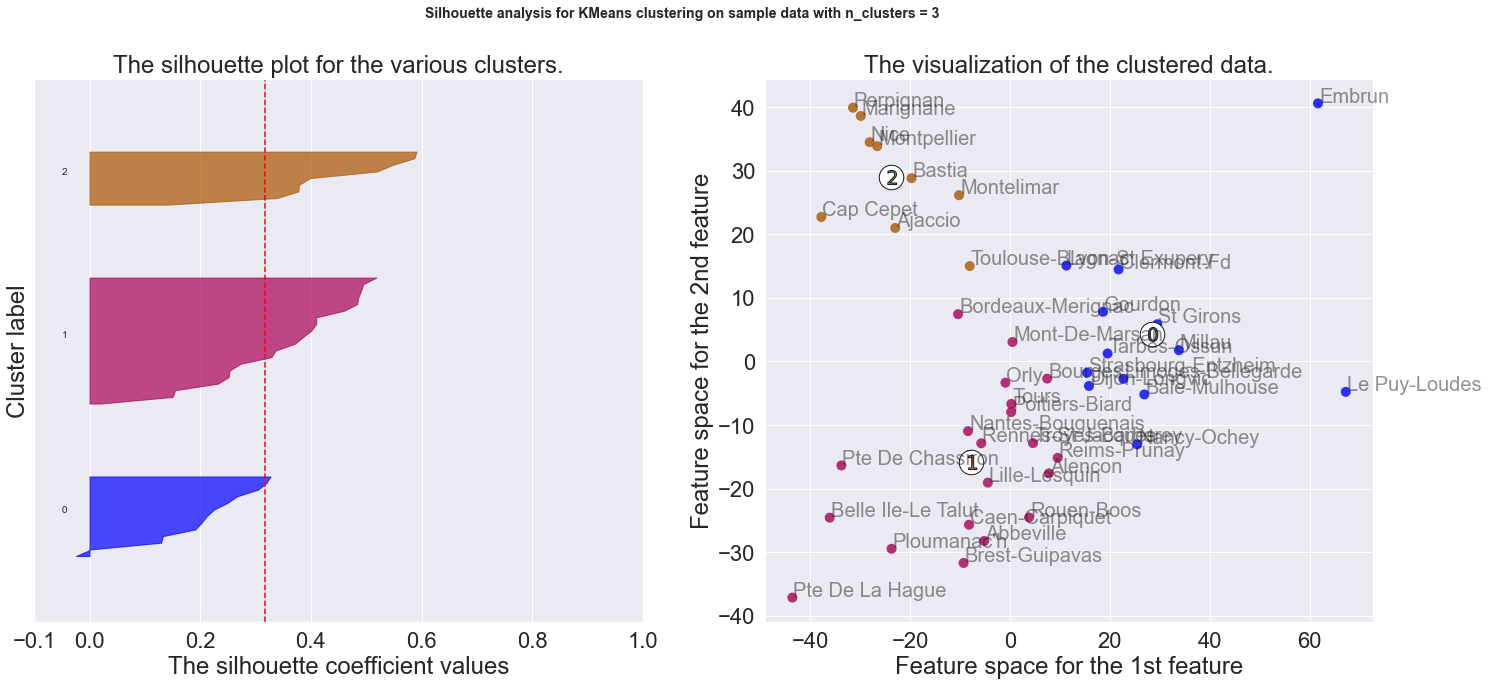

For n_clusters = 4 The average silhouette_score is : 0.3714167110557162


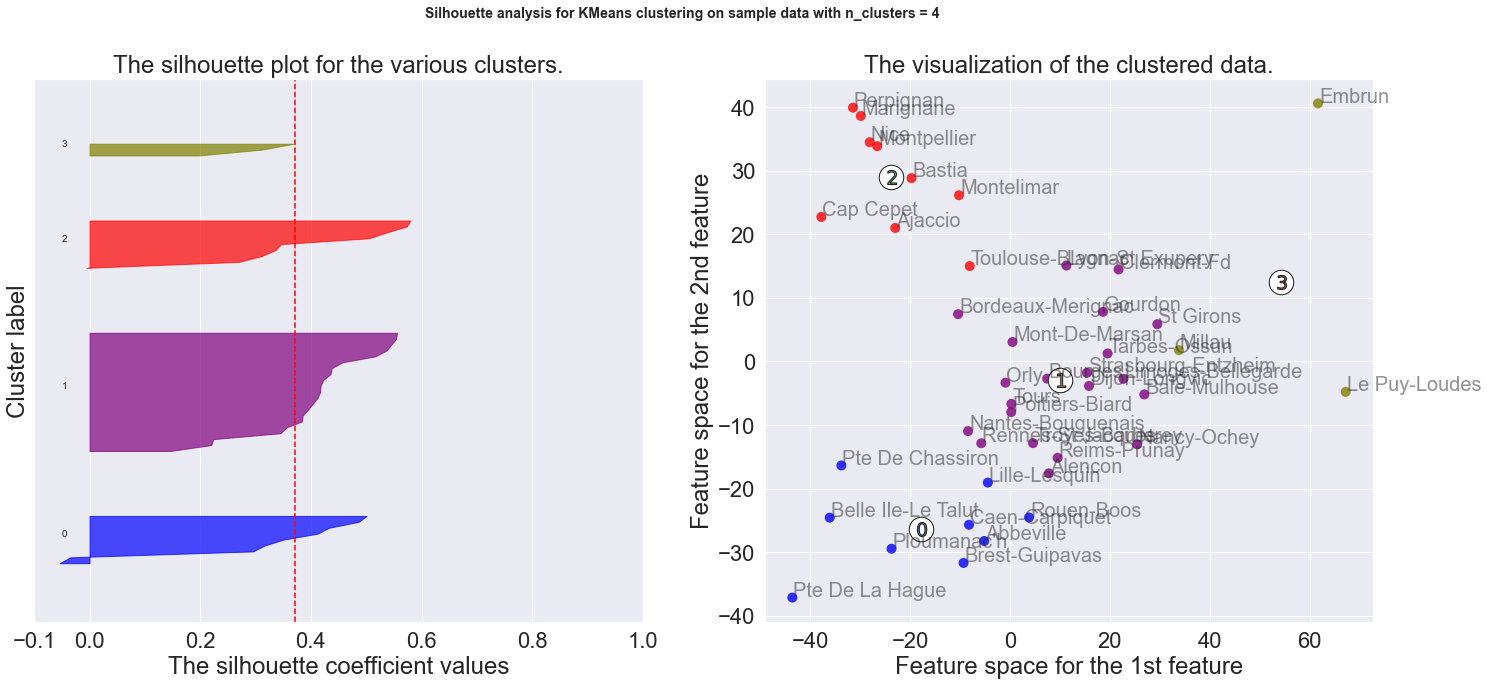

For n_clusters = 5 The average silhouette_score is : 0.3245939344005737


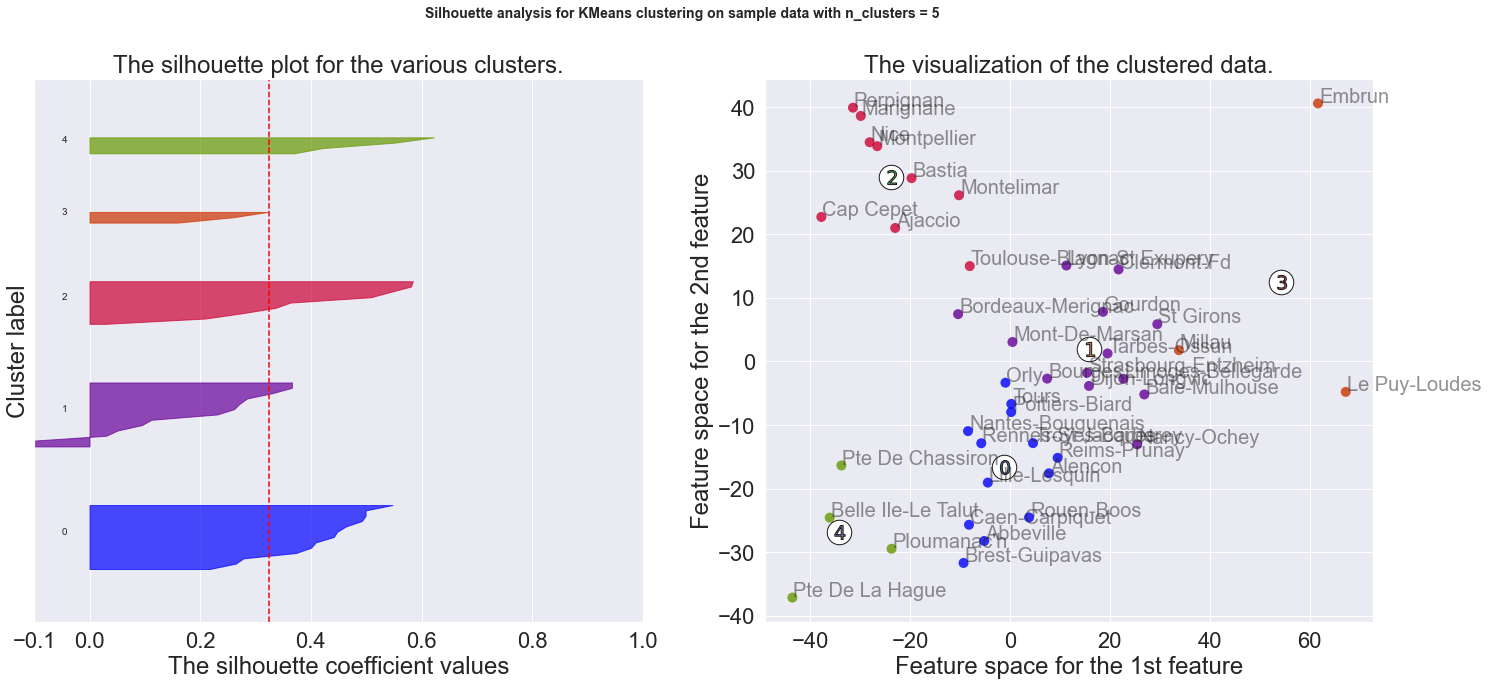

For n_clusters = 6 The average silhouette_score is : 0.32702366863937204


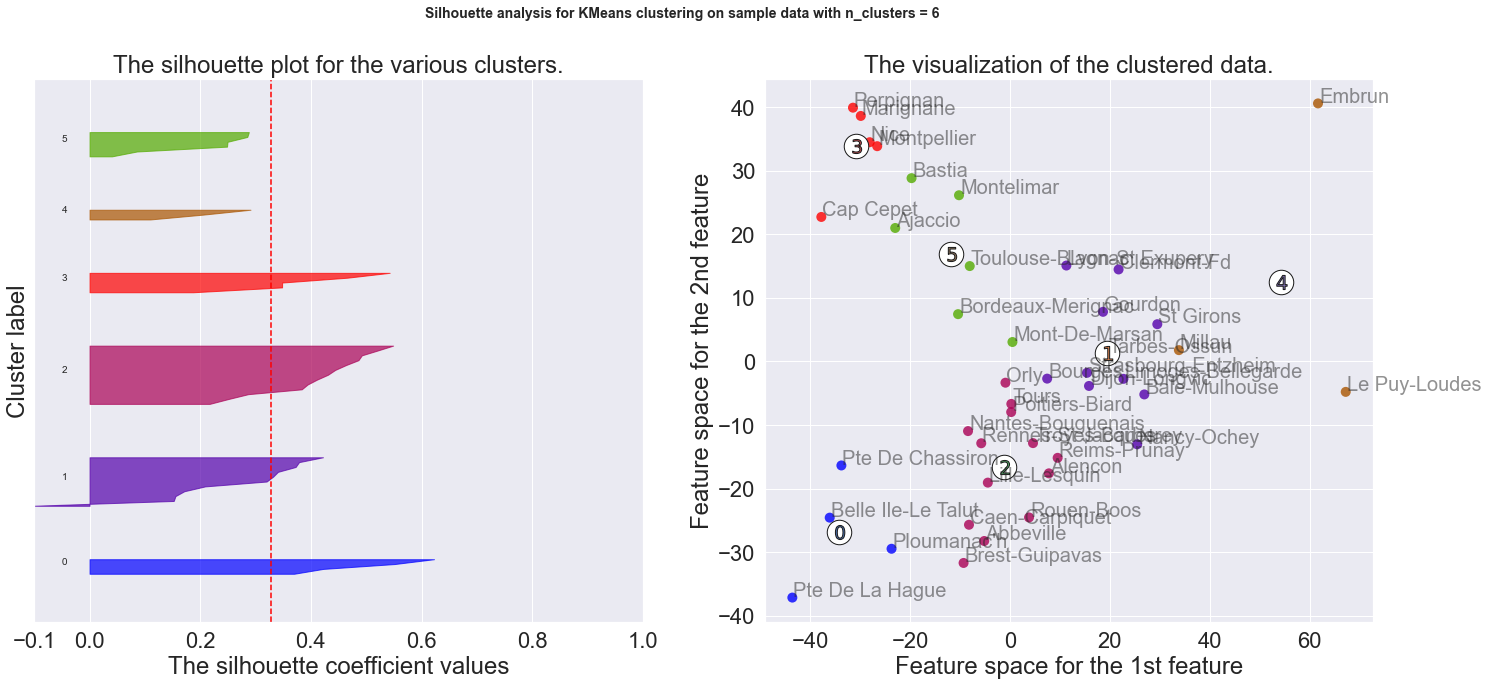

For n_clusters = 7 The average silhouette_score is : 0.32185183969242476


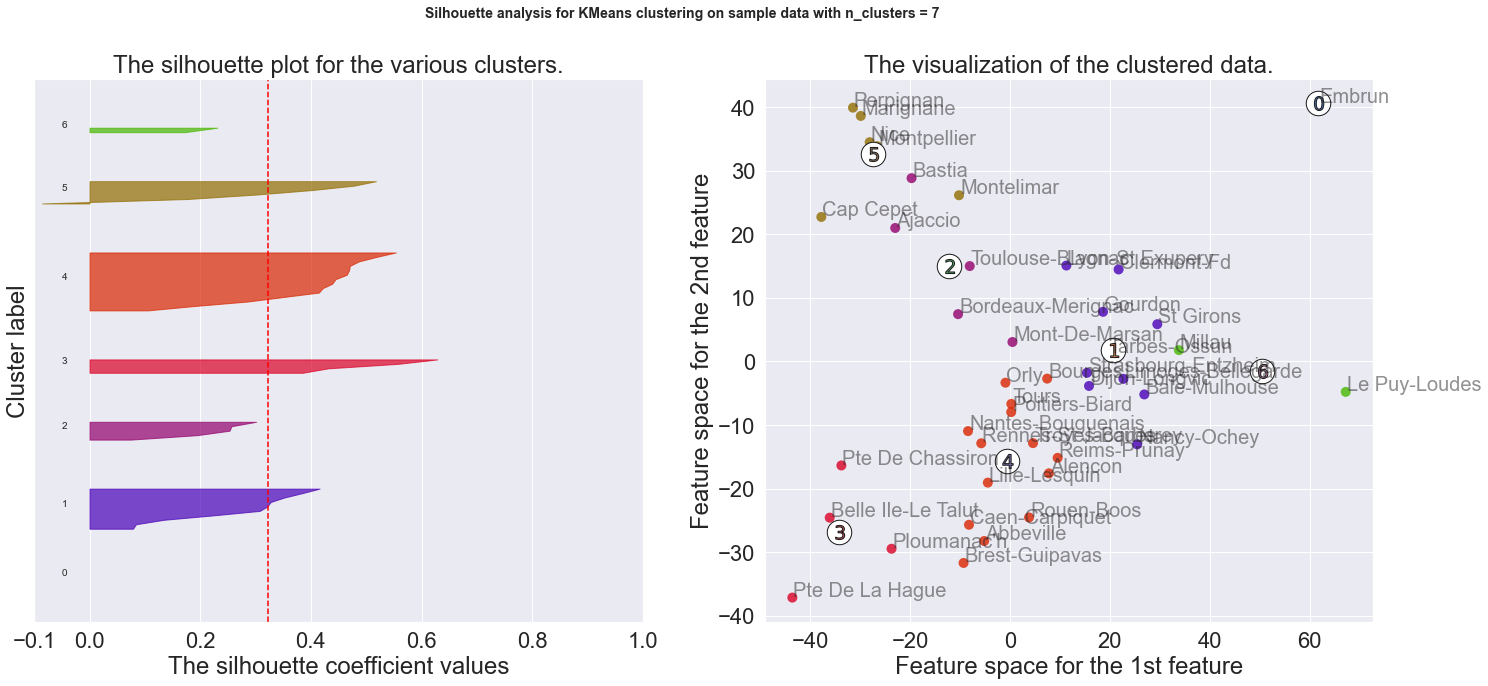

For n_clusters = 8 The average silhouette_score is : 0.26769387734706596


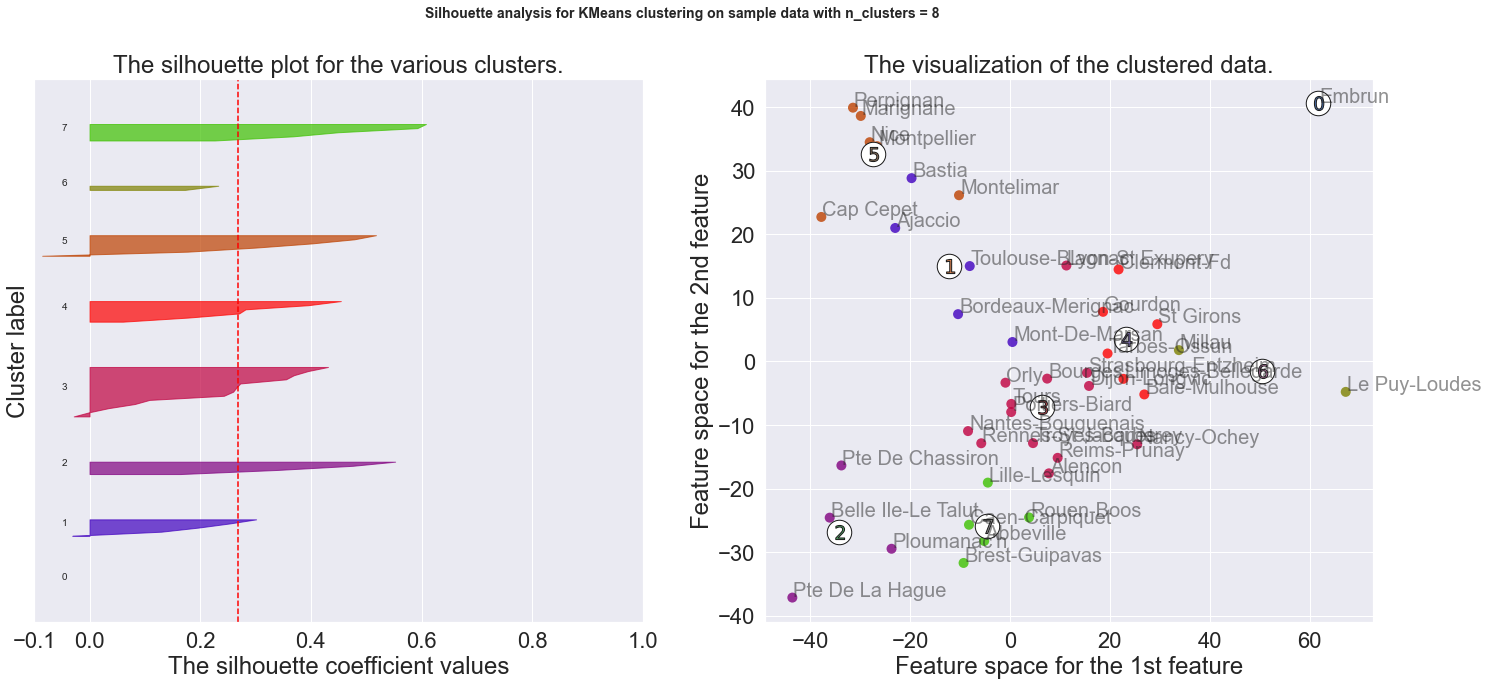

For n_clusters = 9 The average silhouette_score is : 0.2941301539599759


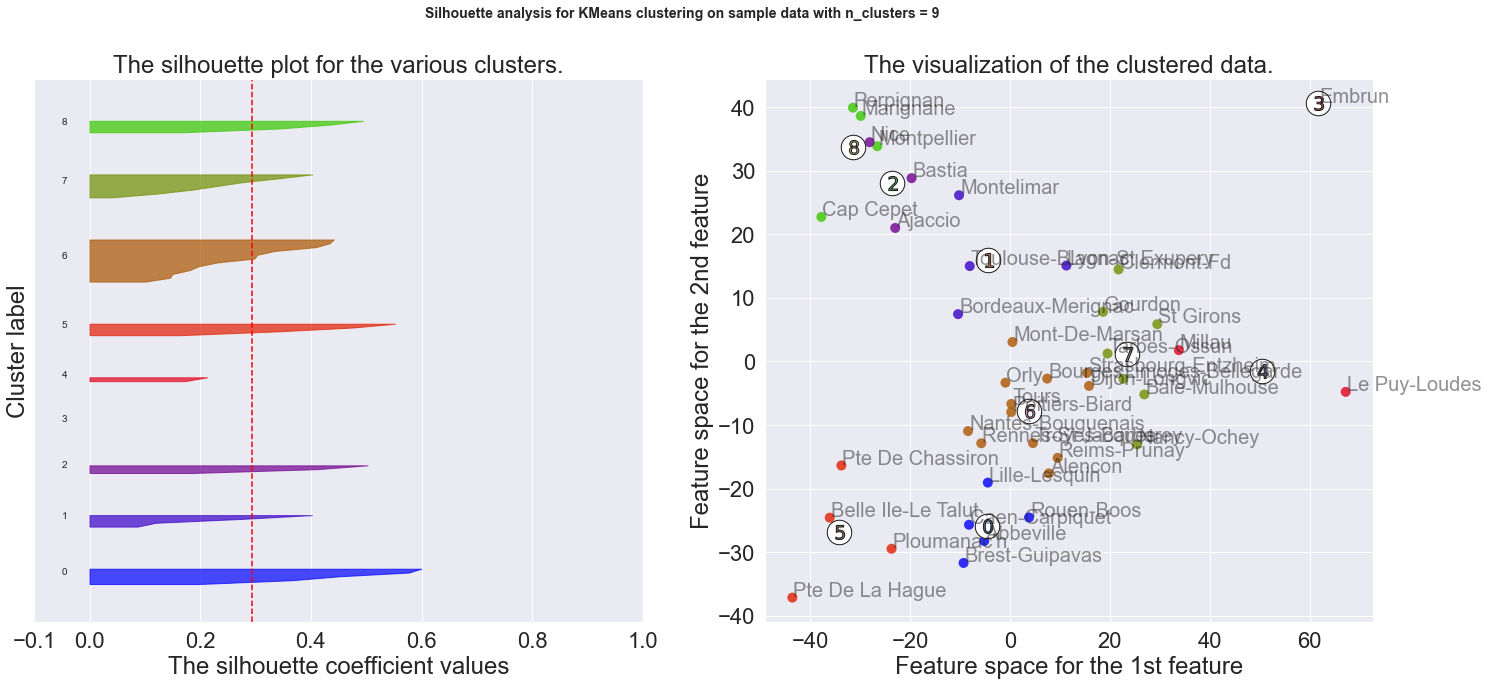

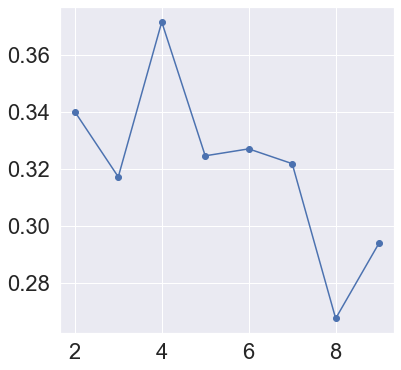

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score,  adjusted_mutual_info_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.2, point['y']+.2, str(point['val']), 
                fontproperties=font1, rotation=0,alpha=.5)

X =  dfPCA.iloc[:,:-4].values

cmap = cm.get_cmap("brg")
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

silhouettes = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(24, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouettes.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i       
        
        color = cmap(float(i) / n_clusters)
        #color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters )
    label_point(dfPCA.Dim1,dfPCA.Dim2, dfPCA.Ville, ax2)
    
    ax2.scatter(X[:, 0], X[:, 1], 
                marker='.', 
                s=400, 
                lw=0, 
                alpha=0.8,
                c=colors, 
                edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], #marker='o',
                c="white", alpha=1, s=600, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=200, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
plt.figure(figsize=(6,6))
plt.plot(range_n_clusters,silhouettes,marker='o')
plt.show()